In [1]:
from kami.entities import *
from kami.interactions import *

from kami import add_interaction, add_interactions, KamiHierarchy

from regraph import plot_graph, print_graph

In [2]:
# Define a gene EGFR with phosphorylated residue Y1092 
egfr_Y1092p = Gene(
    uniprotid="P00533", hgnc_symbol="EGFR",
    residues=[Residue("Y", 1092, state=State("phosphorylation", True))])

# Define a gene Grb2 (no PTMs)
grb2 = Gene("P62993",  hgnc_symbol="GRB2")
print("EGFR gene: ", egfr_Y1092p)
print("GRB2 gene: ", grb2)

EGFR gene:  P00533(residues=[Y1092])
GRB2 gene:  P62993


In [3]:
# Define a binding of EGFR to the SH2 domain of Grb2 through some binding site "motif1092" (residues 1088-1096)
bnd = Binding(
    [SiteActor(gene=egfr_Y1092p,
               site=Site(name="motif1092", start=1088, end=1096))],
    [RegionActor(gene=grb2, region=Region(name="SH2"))],
    rate=0.0002
)
print(bnd)

Binding:
	Left members: P00533(residues=[Y1092])_site_motif1092_1088_1096
	Right members: Region_SH2_P62993
	Direct? True
	Rate: 0.0002



In [4]:
# create
hierarchy = add_interaction(bnd)

Loading InterPro Data version 66
Generated nugget 'nugget_1'...


/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


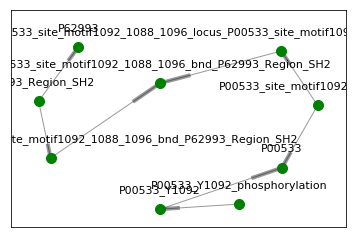


Nodes:

P00533  :  {'uniprotid': {'P00533'}, 'hgnc_symbol': {'EGFR'}}
P00533_Y1092  :  {'aa': {'Y'}, 'loc': {1092}}
P00533_Y1092_phosphorylation  :  {'phosphorylation': {True}}
P00533_site_motif1092_1088_1096  :  {'start': {1088}, 'end': {1096}, 'name': {'motif1092'}}
P62993  :  {'uniprotid': {'P62993'}, 'hgnc_symbol': {'GRB2'}}
P62993_Region_SH2  :  {'name': {'SH2'}}
P00533_site_motif1092_1088_1096_bnd_P62993_Region_SH2  :  {'rate': {0.0002}, 'direct': {True}}
P00533_site_motif1092_1088_1096_locus_P00533_site_motif1092_1088_1096_bnd_P62993_Region_SH2  :  {}
P62993_Region_SH2_locus_P00533_site_motif1092_1088_1096_bnd_P62993_Region_SH2  :  {}

Edges:

P00533_Y1092 -> P00533  :  {}
P00533_Y1092_phosphorylation -> P00533_Y1092  :  {}
P00533_site_motif1092_1088_1096 -> P00533  :  {}
P00533_site_motif1092_1088_1096 -> P00533_site_motif1092_1088_1096_locus_P00533_site_motif1092_1088_1096_bnd_P62993_Region_SH2  :  {}
P62993_Region_SH2 -> P62993  :  {}
P62993_Region_SH2 -> P62993_Region_SH2_l

In [5]:
plot_graph(hierarchy.nugget["nugget_1"])
print_graph(hierarchy.nugget["nugget_1"])